## Name : Pravin Nandankar
## Roll No : 58
## Practical 1 : Deep Learning
## Date : 20/12/24

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/InsuranceCostsDatta.csv");

In [ ]:
df.head()

,person_id,age,sex,bmi,children,smoker,region,total_charges
0,1,19.0,female,27.900,0,yes,southwest,16884.9240
1,2,18.0,male,33.770,1,no,southeast,1725.5522
2,3,28.0,male,33.000,3,no,southeast,4449.4620
3,4,33.0,male,22.705,0,no,northwest,21984.4700
4,5,32.0,male,28.880,0,no,northwest,3866.8552


In [3]:
## Automate the EDA Process
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 81.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=64753b109d10e9a71f6a3f043bf41c937816583590c532643d211caab26d7c38
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [4]:
from ydata_profiling import ProfileReport

In [5]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# handle missing values
# Check for missing values
print(df.isnull().sum())
df = df.dropna()
# Total missing values
print(f"Total missing values: {df.isnull().sum().sum()}")

person_id        0
age              1
sex              0
bmi              4
children         0
smoker           1
region           6
total_charges    0
dtype: int64
Total missing values: 0


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['region'] = le.fit_transform(df['region'])
df['smoker'] = le.fit_transform(df['smoker'])

In [8]:
# Handle missing values
df.fillna(df.mean(), inplace=True)  # Fill missing numerical values with column mean
df['sex'].fillna(df['sex'].mode()[0], inplace=True)  # Fill missing categorical values with mode
df['region'].fillna(df['region'].mode()[0], inplace=True)
df['smoker'].fillna(df['smoker'].mode()[0], inplace=True)

In [9]:
# Split the data into features (X) and target (y)
X = df.drop('total_charges', axis=1)
y = df['total_charges']

In [10]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
print(df)

      person_id   age  sex     bmi  children  smoker  region  total_charges
0             1  19.0    0  27.900         0       1       3     16884.9240
1             2  18.0    1  33.770         1       0       2      1725.5522
2             3  28.0    1  33.000         3       0       2      4449.4620
3             4  33.0    1  22.705         0       0       1     21984.4700
4             5  32.0    1  28.880         0       0       1      3866.8552
...         ...   ...  ...     ...       ...     ...     ...            ...
1333       1334  50.0    1  30.970         3       0       1     10600.5480
1334       1335  18.0    0  31.920         0       0       0      2205.9807
1335       1336  18.0    0  36.850         0       0       2      1629.8335
1336       1337  21.0    0  25.800         0       0       3      2007.9450
1337       1338  61.0    0  29.070         0       1       1     29141.3600

[1328 rows x 8 columns]


In [12]:
from sklearn.preprocessing import StandardScaler
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
!pip install livelossplot
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from livelossplot import PlotLossesKerasTF
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

In [15]:
# Build the ANN model using Sequential API
model = Sequential()

# Input layer
model.add(Dense(units=64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Output layer
model.add(Dense(units=1))

# Compile the model using SGD optimizer
optimizer = SGD(learning_rate=0.001, clipvalue=1.0)  # You can adjust the learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [16]:
# Check for missing values in the dataset
print(df.isnull().sum())

person_id        0
age              0
sex              0
bmi              0
children         0
smoker           0
region           0
total_charges    0
dtype: int64


In [17]:
# Function to create and compile the model
def create_model(optimizer):
    model = Sequential()
    model.add(Dense(units=64, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [18]:
from livelossplot import PlotLossesKerasTF

####  Stochastic Gradient Descent (SGD)

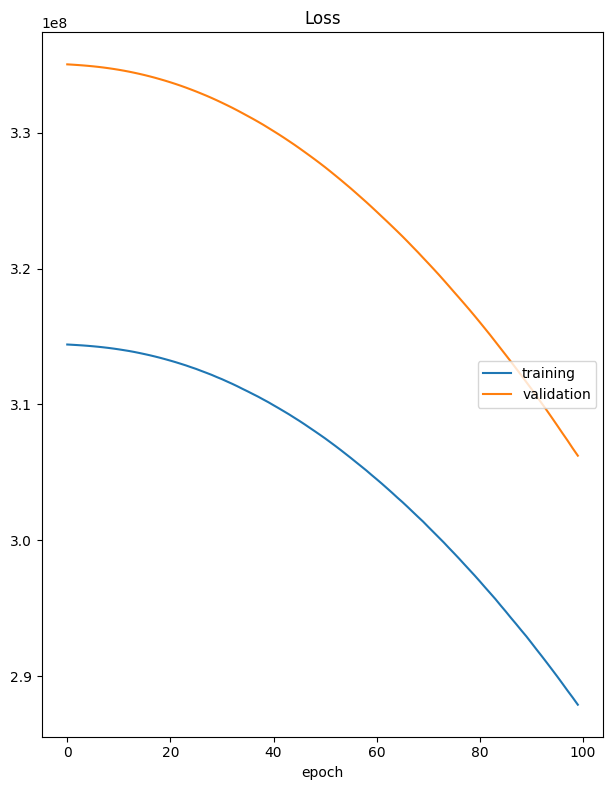

Loss
	training         	 (min: 287888416.000, max: 314418304.000, cur: 287888416.000)
	validation       	 (min: 306229888.000, max: 335052192.000, cur: 306229888.000)
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 296410048.0000 - val_loss: 306229888.0000


In [19]:
# Apply SGD Optimizer
optimizer_sgd = SGD(learning_rate=0.001,clipvalue=1.0)  # SGD optimizer
model_sgd = create_model(optimizer_sgd)
print("\nTraining with SGD optimizer:")
history_sgd = model_sgd.fit(X_train_scaled, y_train, epochs=100, batch_size=32,validation_data=(X_test_scaled,y_test), verbose=1, callbacks=[PlotLossesKerasTF()])

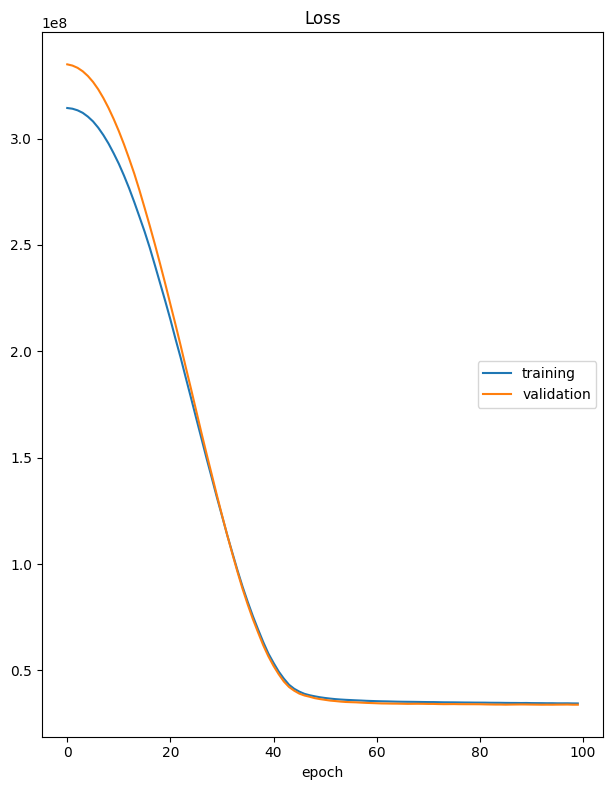

Loss
	training         	 (min: 34509228.000, max: 314372544.000, cur: 34509228.000)
	validation       	 (min: 33922232.000, max: 334892032.000, cur: 33928624.000)
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 28666046.0000 - val_loss: 33928624.0000


In [21]:
# Apply Momentum-based SGD Optimizer
optimizer_momentum = SGD(learning_rate=0.001, momentum=0.9,clipvalue=1.0)  # Momentum optimizer
model_momentum = create_model(optimizer_momentum)
print("\nTraining with Momentum-based SGD optimizer:")
history_momentum = model_momentum.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, callbacks=[PlotLossesKerasTF()])

# Apply Nesterov Accelerated Gradient Descent Optimizer
optimizer_nag = SGD(learning_rate=0.001, momentum=0.9,clipvalue=1.0, nesterov=True)  # NAG optimizer
model_nag = create_model(optimizer_nag)
print("\nTraining with Nesterov Accelerated Gradient Descent optimizer:")
history_nag = model_nag.fit(X_train_scaled, y_train, epochs=100, batch_size=32,validation_data=(X_test_scaled,y_test), verbose=1, callbacks=[PlotLossesKerasTF()])

In [22]:
# Evaluate models after training
y_pred_sgd = model_sgd.predict(X_test_scaled)
y_pred_momentum = model_momentum.predict(X_test_scaled)
y_pred_nag = model_nag.predict(X_test_scaled)

# Evaluate the models
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)
mse_momentum = mean_squared_error(y_test, y_pred_momentum)
r2_momentum = r2_score(y_test, y_pred_momentum)
mse_nag = mean_squared_error(y_test, y_pred_nag)
r2_nag = r2_score(y_test, y_pred_nag)

# Print comparative analysis
print(f"\nSGD Model - Mean Squared Error: {mse_sgd}")
print(f"Momentum-based SGD Model - Mean Squared Error: {mse_momentum}")
print(f"Nesterov Accelerated GD Model - Mean Squared Error: {mse_nag}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

SGD Model - Mean Squared Error: 306229852.6092942
Momentum-based SGD Model - Mean Squared Error: 33801984.65802666
Nesterov Accelerated GD Model - Mean Squared Error: 33928624.57201113


### Deep Neural Network

In [23]:
# Initialize the model
model1 = Sequential()

# Input layer (first hidden layer)
model1.add(Dense(units=64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Add more hidden layers for DNN
model1.add(Dense(units=128, activation='relu'))  # Additional hidden layer with 128 units
model1.add(Dense(units=64, activation='relu'))   # Another hidden layer with 64 units
model1.add(Dense(units=32, activation='relu'))   # One more hidden layer with 32 units

# Output layer (1 unit for regression)
model1.add(Dense(units=1))


In [26]:
# Compile the model using SGD optimizer
optimizer = SGD(learning_rate=0.001, clipvalue=1.0)
model1.compile(optimizer=optimizer, loss='mean_squared_error')

# Print the model summary to check the architecture
model1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,201 (75.00 KB)

 Trainable params: 19,201 (75.00 KB)

 Non-trainable params: 0 (0.00 B)

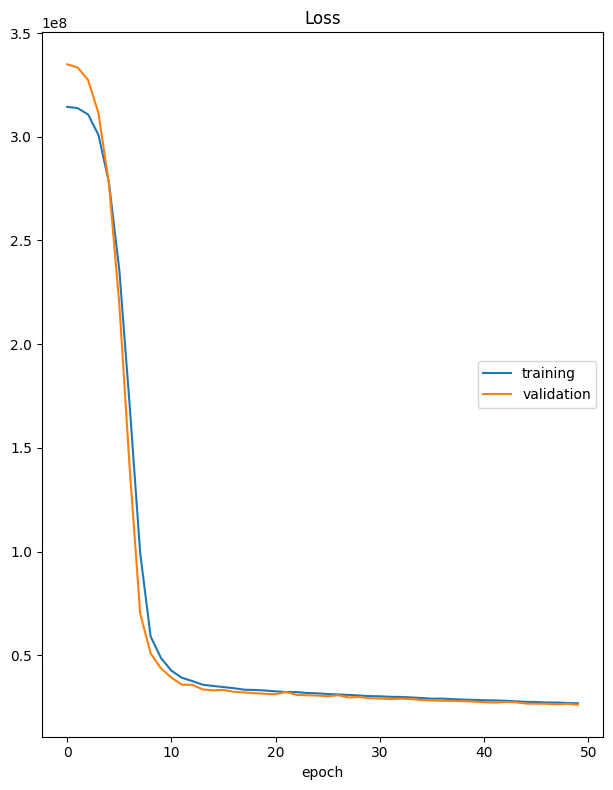

Loss
	training         	 (min: 26835586.000, max: 314391520.000, cur: 26835586.000)
	validation       	 (min: 26152414.000, max: 334890944.000, cur: 26152414.000)
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 27357934.0000 - val_loss: 26152414.0000


In [27]:
# Train the model
from livelossplot import PlotLossesKerasTF
model1.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2,validation_data=(X_test_scaled,y_test),callbacks=[PlotLossesKerasTF()])

In [28]:
# Optionally, you can also predict values on the test set
y_pred = model1.predict(X_test_scaled)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [29]:
# Calculate MSE and R² score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 26152413.03835439
Mean Absolute Error (MAE): 3126.207297753172


In [30]:
# Save the models
model_sgd.save('model_sgd.h5')
model_momentum.save('model_momentum.h5')
model_nag.save('model_nag.h5')

print("\nModels saved successfully!")


Models saved successfully!


In [31]:
# Save the model of DNN
model1.save('model_DNN.h5')

print("\nModels saved successfully!")


Models saved successfully!
